In [22]:
!pip install folium

In [14]:
path = "C:/Users/USER/Downloads/startup data.csv"
df = pd.read_csv(path)

In [25]:
import pandas as pd
import numpy as np
from autoviz.classify_method import data_cleaning_suggestions

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ImportError: cannot import name 'data_cleaning_suggestions' from 'autoviz.classify_method' (C:\Users\USER\anaconda3\Lib\site-packages\autoviz\classify_method.py)

In [5]:
!pip install autoviz

In [11]:
df = pd.read_csv()

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [15]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [17]:
data_cleaning_suggestion(df)

NameError: name 'data_cleaning_suggestion' is not defined

In [18]:
df.drop(['Unnamed: 6', 'Unnamed: 0', 'id', 'name', 'object_id', 'first_funding_at',
         'zip_code', 'city', 'founded_at', 'closed_at', 'age_last_milestone_year',
         'age_first_milestone_year', 'state_code.1',  'last_funding_at'], axis = 1, inplace = True)

In [ ]:
Remove Outlier

In [19]:
std_deviation = 2
mean = df['avg_participants'].mean()
std = df['avg_participants'].std()

upper_threshold = mean + (std_deviation * std)
lower_threshold = mean - (std_deviation * std)
df = df[(df['avg_participants'] >= lower_threshold) & (df['avg_participants'] <= upper_threshold)]

In [31]:
latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial], 
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

In [29]:
import folium

In [20]:
df.head()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

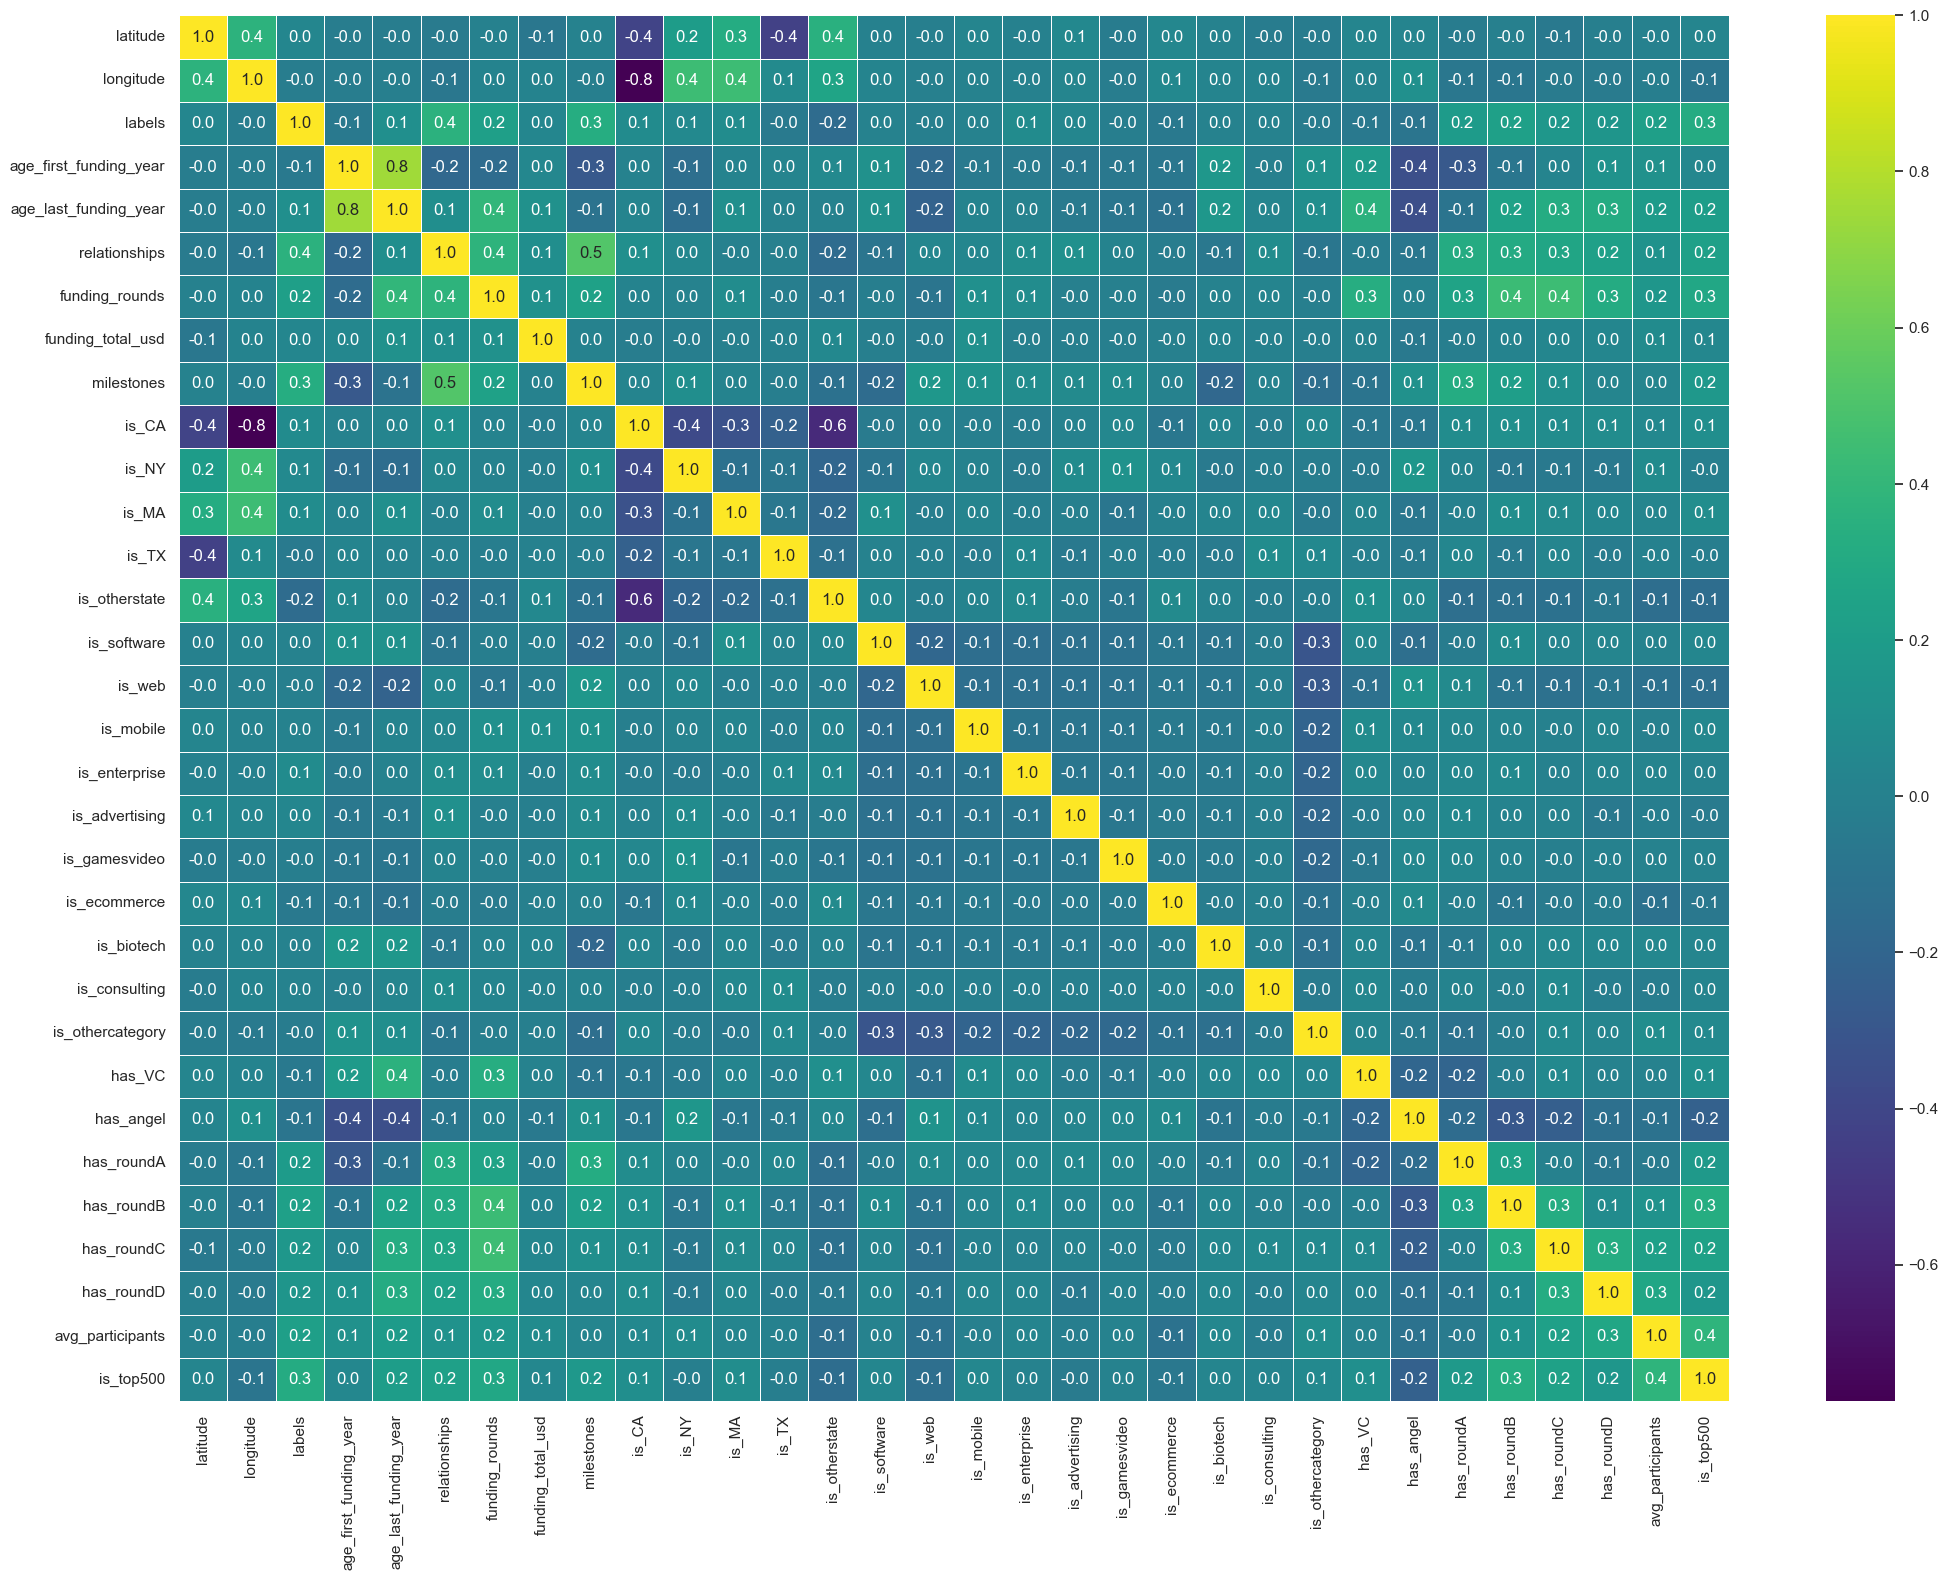

In [33]:
plt.figure(figsize = (25, 18))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

<Axes: xlabel='status', ylabel='count'>

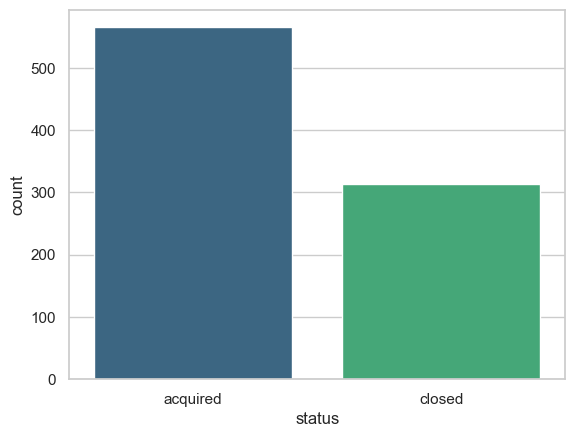

In [34]:
sns.countplot(x = df['status'], palette = 'viridis')

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [37]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [38]:
df.head()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,1,0,0,0,0,19,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0
1,2,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,1,0,0,0,0,8,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0
2,2,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,1,0,0,0,0,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0
3,2,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,1,0,0,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0
4,2,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,1,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,1


In [ ]:
Train and Test

In [39]:
X = df.drop(['status', 'latitude', 'longitude'], axis = 1)
y = df['status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
lr = LogisticRegression()

lr.fit(xtrain, ytrain)
pred_lr = lr.predict(xtest)

In [41]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
pred_dt = dt.predict(xtest)

In [42]:
accuracy = accuracy_score(ytest, pred_lr)
precision = precision_score(ytest, pred_lr)
recall = recall_score(ytest, pred_lr)
f1 = f1_score(ytest, pred_lr)

print('LogisticRegression Accuracy: %f' % accuracy)
print('LogisticRegression Precision: %f' % precision)
print('LogisticRegression Recall: %f' % recall)
print('LogisticRegression F1-Score: %f' % f1)

LogisticRegression Accuracy: 0.640909
LogisticRegression Precision: 0.000000
LogisticRegression Recall: 0.000000
LogisticRegression F1-Score: 0.000000


In [43]:
!pip install kaggle

     ---------------------------------------- 0.0/79.7 kB ? eta -:--:--
     ---------- ----------------------------- 20.5/79.7 kB ? eta -:--:--
     ---------- ----------------------------- 20.5/79.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/79.7 kB 187.9 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/79.7 kB 187.9 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/79.7 kB 163.4 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/79.7 kB 163.4 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/79.7 kB 163.4 kB/s eta 0:00:01
     ------------------------ ------------- 51.2/79.7 kB 119.1 kB/s eta 0:00:01
     ----------------------------- -------- 61.4/79.7 kB 126.1 kB/s eta 0:00:01
     ----------------------------- -------- 61.4/79.7 kB 126.1 kB/s eta 0:00:01
     ---------------------------------- --- 71.7/79.7 kB 119.1 kB/s eta 0:00:01
     -------------------------------------- 79.7/79.7 kB 130.7